# Data Visualization: Explorando com Seaborn

Certificação: https://cursos.alura.com.br/certificate/f407bd28-1174-4505-8814-5ca82a63bcb9

<h2>Objetivo do treinamento:</h2>

<ul>
    <li>Importe dados e trabalhe com dataframes</li>
    <li>Aprenda a tratar os dados antes de análisar</li>
    <li>Saiba como utilizar o Seaborn para criação de diferentes gráficos</li>
    <li>Utilize o Python Pandas com a incrível ferramenta do Google Colaboratory</li>
    <li>Desenvolva técnicas gráficas e quantitativas, buscando a obtenção de informações relevantes</li>
</ul>

<h2>Aulas</h2>

<ol>
    <li>Importando e traduzindo os dados</li>
    <li>Comparando distribuições de maneira exploratória</li>
    <li>Analisando de forma visual e descritiva</li>
    <li>Comparando e explorando os dias da semana</li>
    <li>Distribuição de frequência e teste de hipótese</li>
</ol>

## 1. Importando e traduzindo os dados

### Importe de módulos

In [1]:
# Python version
from platform import python_version
print('Python version:', python_version())

Python version: 3.8.5


In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import ranksums

# Warnings remove 
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import da base de dados
gorjetas = pd.read_csv('data/tips.csv')
gorjetas.rename(columns={'total_bill':'valor_da_conta',
                     'tip':'gorjeta',
                     'dessert':'sobremesa',
                     'day':'dia_da_semana',
                     'time':'hora_do_dia',
                     'size':'total_de_pessoal'}, inplace=True)

sim_nao = {'No':'Não','Yes':'Sim'}
dias_nome = {'Sun':'Dom', 'Sat':'Sáb', 'Thur':'Qui', 'Fri':'Sex'}
refeicao_nome = {'Dinner':'Jantar', 'Lunch':'Almoço'}

gorjetas['sobremesa'] = gorjetas['sobremesa'].map(sim_nao)
gorjetas['dia_da_semana'] = gorjetas['dia_da_semana'].map(dias_nome) 
gorjetas['hora_do_dia'] = gorjetas['hora_do_dia'].map(refeicao_nome) 

gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoal
0,16.99,1.01,Não,Dom,Jantar,2
1,10.34,1.66,Não,Dom,Jantar,3
2,21.01,3.50,Não,Dom,Jantar,3
3,23.68,3.31,Não,Dom,Jantar,2
4,24.59,3.61,Não,Dom,Jantar,4


# 2. Comparando distribuições de maneira exploratória

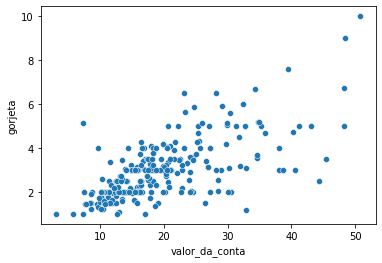

In [4]:
#Análise 1 - Valor de gorjeta

valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data = gorjetas)

<strong>Visualmente o valor da gorjeta aumentar conforme o valor da conta aumenta.</strong>

In [5]:
#Criando o campo de porcentagem de gorjeta

gorjetas['porcentagem'] = gorjetas['gorjeta'] /gorjetas['valor_da_conta'] 
gorjetas['porcentagem'] = gorjetas['porcentagem'].round(2)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoal,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16
2,21.01,3.50,Não,Dom,Jantar,3,0.17
3,23.68,3.31,Não,Dom,Jantar,2,0.14
4,24.59,3.61,Não,Dom,Jantar,4,0.15


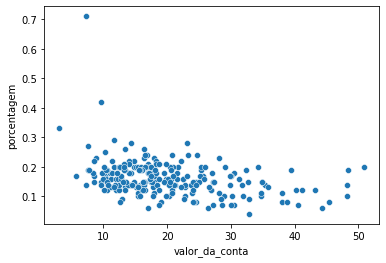

In [6]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data = gorjetas)

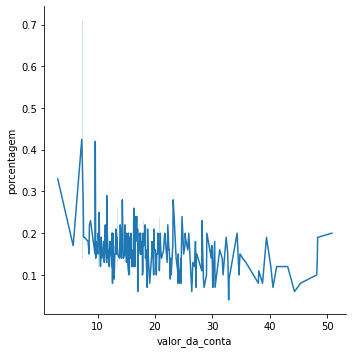

In [7]:
# Outro tipo de gráfico

porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data = gorjetas)

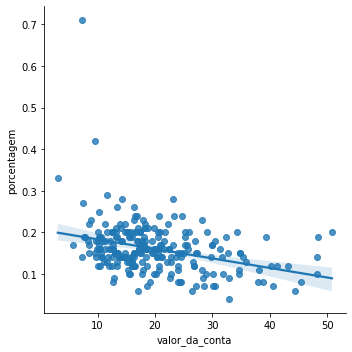

In [8]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data = gorjetas)

<strong>Visualmente é possivel constatar que o valor da conta não cresci percentualmente junto com a conta, e sim que conforme o valor da conta aumenta o percentual de gorjeta diminui.</strong>

# 3. Analisando de forma visual e descritiva

In [9]:
# Análise 2 - Sobremesa

gorjetas[gorjetas['sobremesa'] =='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoal,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


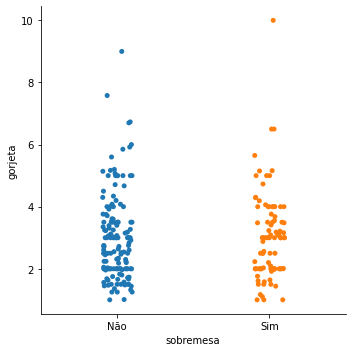

In [10]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas);

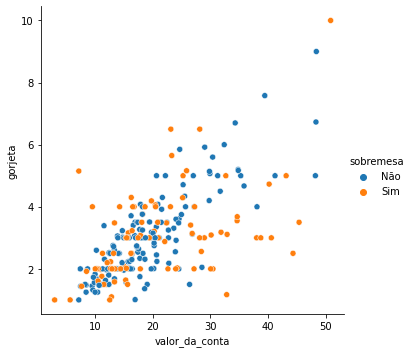

In [11]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data = gorjetas);

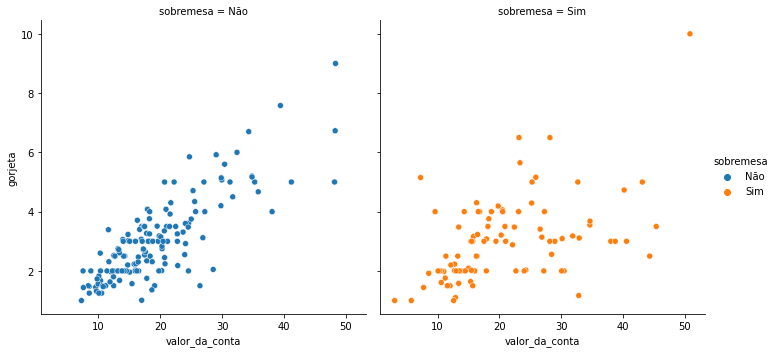

In [12]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa',col='sobremesa', data = gorjetas);

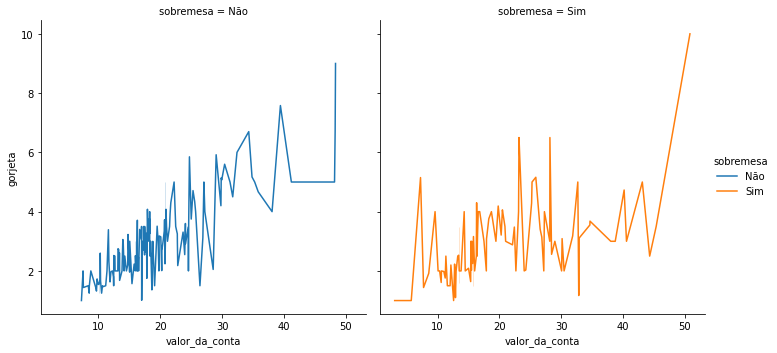

In [13]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa',col='sobremesa',kind='line', data = gorjetas);

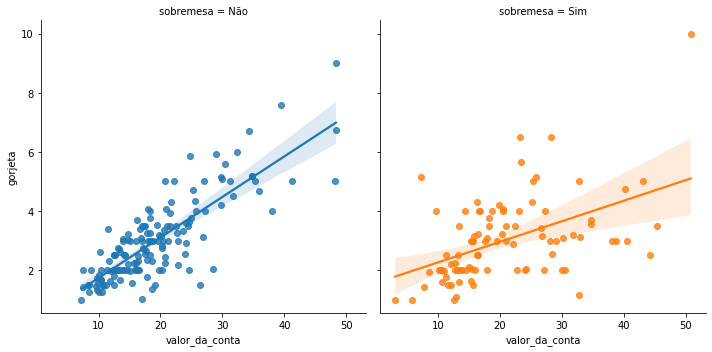

In [14]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa',col='sobremesa', data = gorjetas);

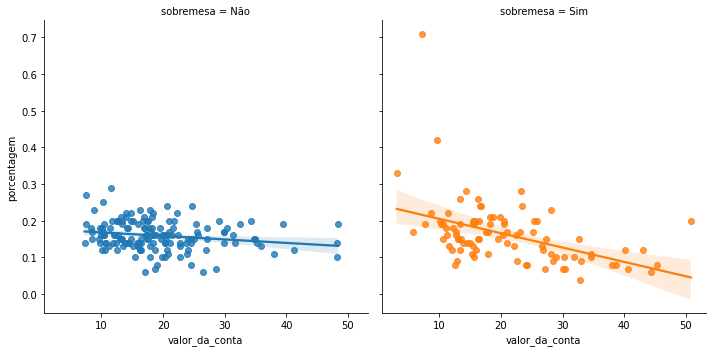

In [15]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='sobremesa',col='sobremesa', data = gorjetas);

<strong>Visualmente existe uma diferença no valor de gorjeta entre quem pediu sobremesa daqueles que não pediram, é possivel notar que quem pede sobremesa costuma pagar menos gorjeta percentualmente do valor da conta.</strong>

## Teste de hipótese

**H<sup>null</sup>**
**Adistribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
**Adistribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [16]:
com_sobremesa = gorjetas[gorjetas['sobremesa'] == 'Sim']['porcentagem']
sem_sobremesa = gorjetas[gorjetas['sobremesa'] == 'Não']['porcentagem']

In [17]:
#Hnull Adistribuição da taxa da gorjeta é a mesma nos dois grupos
ranksums(com_sobremesa, sem_sobremesa)

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

# 4. Comparando e explorando os dias da semana

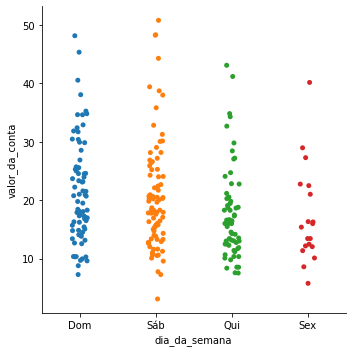

In [18]:
# Análise 3 - Dia da Semana

sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

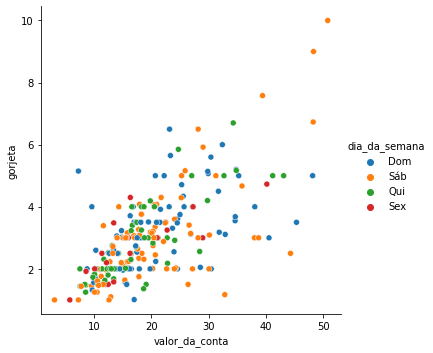

In [19]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas);

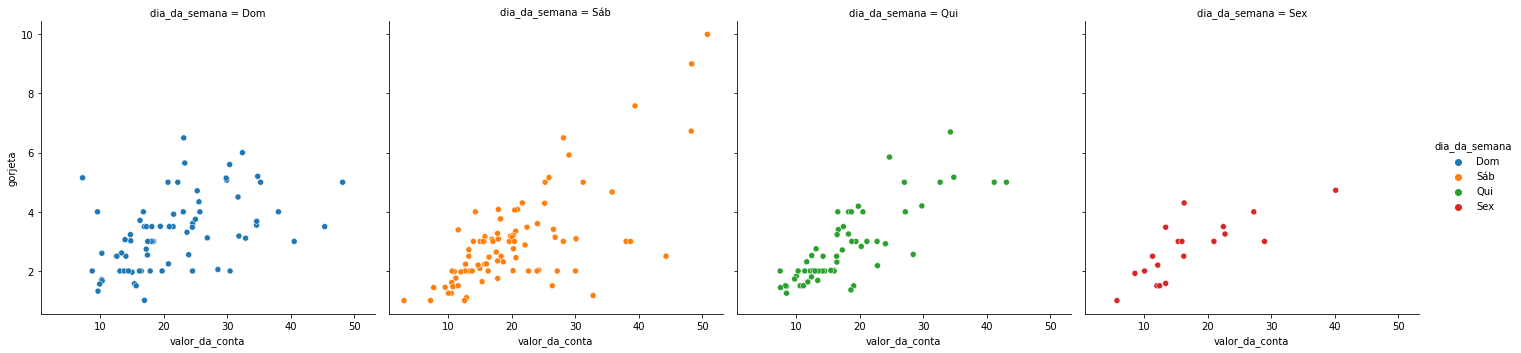

In [20]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana',col='dia_da_semana', data=gorjetas);

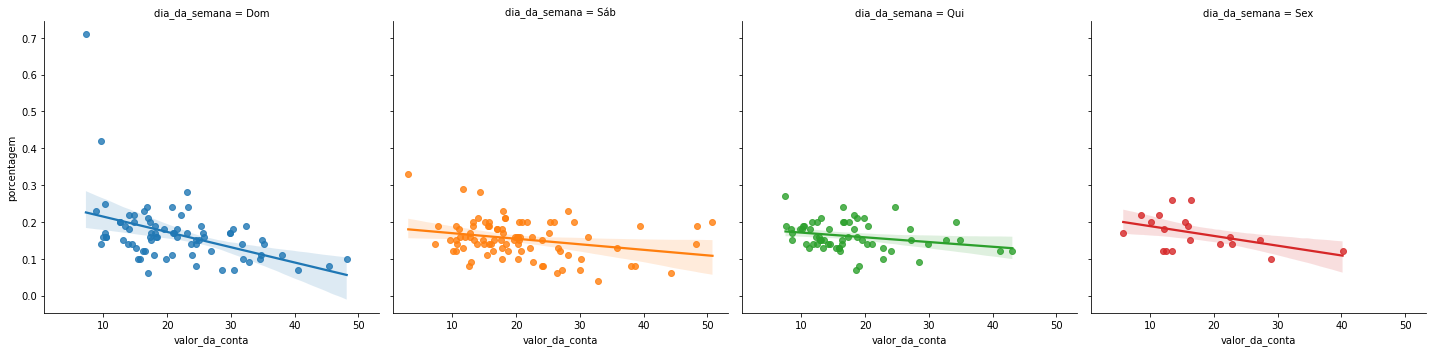

In [21]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana',col='dia_da_semana', data=gorjetas);

In [22]:
print('Frequência dos dias')
gorjetas['dia_da_semana'].value_counts()

Frequência dos dias


Sáb    87
Dom    76
Qui    62
Sex    19
Name: dia_da_semana, dtype: int64

In [23]:
# print
gorjetas.groupby(['dia_da_semana'])[['valor_da_conta', 'gorjeta','porcentagem']].mean()

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Dom,21.410000,3.255132,0.166974
Qui,17.682742,2.771452,0.161129
Sex,17.151579,2.734737,0.169474
Sáb,20.441379,2.993103,0.153678


## Teste de hipótese

**H<sup>null</sup>**
**A distribuição da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**
**A distribuição da conta não é igual no sábado e no domingo**

In [24]:
valor_conta_domingo = gorjetas[gorjetas['dia_da_semana'] =='Dom']['valor_da_conta']
valor_conta_sabado = gorjetas[gorjetas['dia_da_semana'] =='Sáb']['valor_da_conta']

# A distribuição da conta é igual no sábado e no domingo
ranksums(valor_conta_domingo, valor_conta_sabado)

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

# 5. Distribuição de frequência e teste de hipótese

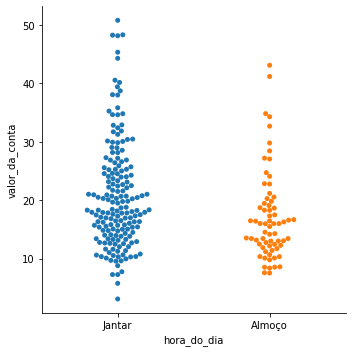

In [25]:
# Análise 4 - Hora do dia

sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas);

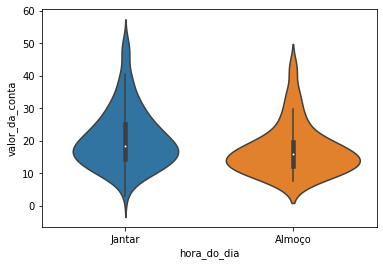

In [26]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas);

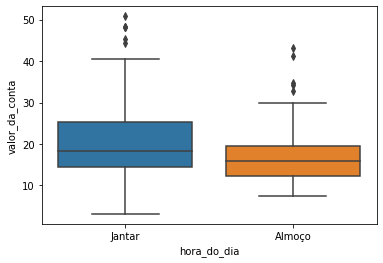

In [27]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data= gorjetas);

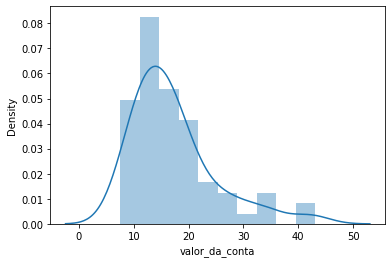

In [28]:
almoco = gorjetas[gorjetas['hora_do_dia'] == 'Almoço']['valor_da_conta']

sns.distplot(almoco, kde=True);

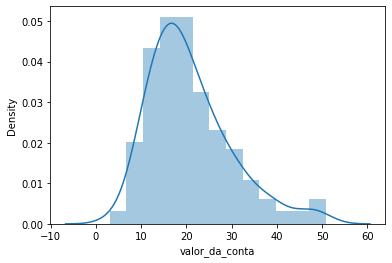

In [29]:
jantar = gorjetas[gorjetas['hora_do_dia'] == 'Jantar']['valor_da_conta']

sns.distplot(jantar, kde=True);

In [30]:
gorjetas.groupby(['hora_do_dia'])[['valor_da_conta', 'gorjeta', 'porcentagem']].mean()

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese

**H<sup>null</sup>**
**A distribuição da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**
**A distribuição da conta não é igual no jantar e no almoço**

In [31]:
valor_conta_almoco = gorjetas[gorjetas['hora_do_dia'] =='Almoço']['valor_da_conta']
valor_conta_jantar = gorjetas[gorjetas['hora_do_dia'] =='Jantar']['valor_da_conta']

# A distribuição da conta não é igual no jantar e no almoço
ranksums(valor_conta_almoco, valor_conta_jantar)

RanksumsResult(statistic=-3.2438872807262955, pvalue=0.0011791039723641672)